In [63]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
transform = transforms.ToTensor()

In [65]:
train_data_set =datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data_set = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

In [66]:
test_data_set

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [67]:
rand_labels_train = torch.tensor(np.random.randint(0,10, (len(train_data_set)),))
train_data_set.targets = rand_labels_train
rand_labels_test = torch.tensor(np.random.randint(0,10, (len(test_data_set)),))
test_data_set.targets = rand_labels_test

In [68]:
#Data for training and testing
train_loader = DataLoader(train_data_set, batch_size=100, shuffle=True)
test_loader = DataLoader(test_data_set, batch_size=100,shuffle=True)

In [69]:
class Model(nn.Module):
    def __init__(self, inp=784, h1=120, h2=120,h3=16, outp=10):
        super().__init__()
        self.fc1 = nn.Linear(inp,h1)    
        self.fc2 = nn.Linear(h1, h2)
        self.fc3 = nn.Linear(h2, h3)
        self.out = nn.Linear(h3, outp)
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.out(x)
        return x

In [70]:
model=Model()

In [71]:
CriterionLoss = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)

In [72]:
epochs = 100
train_losses = []
test_losses = []

for i in range(epochs):
    
    #training the batches
    for b, (X_train, y_train) in enumerate(train_loader):
        
        # Applying the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = CriterionLoss(y_pred, y_train)
 
        # Updating the parameters
        optim.zero_grad()
        loss.backward()
        optim.step()
        
     
    # Appending train loss  for the epoch
    train_losses.append(loss)
        
    # testing the batches
    with torch.no_grad():
        for b, (X_test, y_test) in enumerate(test_loader):

            # Applying  the model
            y_val = model(X_test.view(100, -1)) 
    
    # Appending test loss for the epoch
    loss = CriterionLoss(y_val, y_test)
    test_losses.append(loss)
    

In [73]:
train_losses=torch.tensor(train_losses)
test_losses=torch.tensor(test_losses)

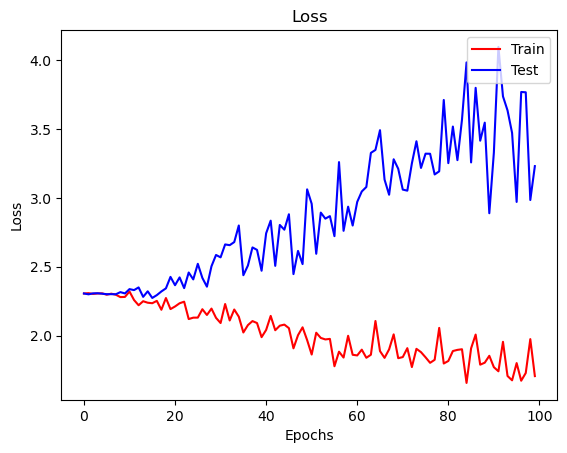

In [74]:
# Visulaize losses for for MNIST dataset
plt.plot(range(epochs), train_losses, 'r', label='Train')
plt.plot(range(epochs), test_losses, 'b', label='Test')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.show()